### 2. 통계분석 (50점)

In [ ]:
#### 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.
#### 2. 코로나 시계열 데이터로 다음을 수행하시오.
#### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [3]:
#### 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.
import numpy as np
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import stats

x = [52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14 ]
# 정규성 검증
mu = 60
shapiro(x) # pvalue가 0.05보다 크므로 정규성을 따른다.


ShapiroResult(statistic=0.965764582157135, pvalue=0.849041759967804)

In [7]:
stats.ttest_1samp(x, popmean=mu) 
# 검정 결과, p-value가 0.06이므로 0.05보다 크다. 따라서 귀무가설을 채택한다. 즉, 시제품의 농도는 60이라고 판단할 수 있다.

Ttest_1sampResult(statistic=-2.099292080780179, pvalue=0.06519313277276138)

In [8]:
# 중심극한의 정리를 적용하기에 표본의 크기가 작으므로 비모수 분석의 부호검정을 실시한다.
# 유효한 샘플의 수는 최소 표본크기를 계산하여 설정할 수 있다.
# 최소 표본크기의 계산은 허용오차식을 바탕으로 한다.
# 허용할 수 있는 오차한계와 신뢰수준이 주어졌을 때, 샘플로부터 추정한 표준편차를 사용해 표본의 크기를 구할 수 있다.
# 오차한계를 5, 신뢰수준을 0.05로 설정한 뒤 샘플의 표준편차를 구한다.

In [9]:
moe = 5
a = 0.05
std = np.std(x)
print(std)

17.434448657758008


In [14]:
# 유효한 샘플의 수
from scipy import stats
(stats.t.ppf(q=0.05, df=9)*std/5)**2

40.85590828532381

In [19]:
# Wilcoxon의 부호검정을 검정방법으로 선택한다. 이 검정방식은 모집단이 정규성을 만족하지 못할때 사용하는 검정이며, 비교대상들 사이의 차이를 부호와 크기에 대한 정보로 바꾸어 이를 토대로 분포를 비교하는 방식이다.
import pandas as pd
stats.wilcoxon(pd.Series(x)-60)
# 검정 결과, p-value가 0.06이므로 0.05보다 크다. 따라서 귀무가설을 채택한다. 즉, 시제품의 농도는 60이라고 판단할 수 있다.

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

In [22]:
#### 2. 코로나 시계열 데이터로 다음을 수행하시오
# 2.1 ACF를 사용해서 distancd를 계산
# 2.2 계층적 군집 분석을 위해 덴드로그램을 작성
covid = pd.read_csv('C:/adp/data/서울특별시 코로나19.csv')
covid.tail()


,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
780,2020-02-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
781,2020-02-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
782,2020-02-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
783,2020-02-06,3,0,0,0,0,0,1,2,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
784,2020-02-05,3,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [27]:
covid1 = covid[covid.columns.difference(['날짜'])]
covid1

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,136200,121926,75118,148359,132305,96008,109973,63687,135361,82254,95433,106238,98454,79934,104368,81018,116862,176765,115771,110293,55376,119150,37261,33753,103288
1,132333,118842,72934,143573,127626,93474,106162,61840,130878,79677,92993,102955,95523,77705,100529,79030,113609,172292,111900,106171,53872,115116,36216,32835,100255
2,128813,115846,70754,139633,124805,91030,103573,59946,127299,77878,90277,100665,93028,75425,98869,76802,110583,167386,109290,104109,52391,112560,35276,31878,97419
3,126296,113549,70003,137908,123374,89876,102610,59393,125120,76542,89302,99426,92006,74131,96873,76108,109500,165373,107582,102916,51652,110620,34879,31577,96359
4,123992,110649,68329,134285,120413,87770,99938,57925,121314,75119,87345,96989,89871,72644,95124,74178,106437,161650,104991,100349,50720,108254,34061,30903,93690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
783,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,2,1,0,0,0,0,3,0,1


In [34]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags = n_lags)
n_lags = 785
lag_arr = np.repeat(n_lags, covid1.shape[1])
acf_list = list(map(acf, covid1.transpose().to_numpy(), lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = covid1.columns

acf_df

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965594,0.964788,0.964873,0.963102,0.964599,0.965118,0.964896,0.964495,0.962739,0.964677,0.966179,0.964682,0.964855,0.963555,0.964920,0.964843,0.964386,0.965216,0.963406,0.964211,0.965807,0.963757,0.965624,0.966025,0.964429
2,0.931913,0.930000,0.930425,0.927079,0.930349,0.930705,0.930870,0.929726,0.926474,0.930168,0.932781,0.930160,0.930424,0.927627,0.931073,0.930035,0.929349,0.930854,0.927777,0.929708,0.932148,0.928512,0.932172,0.932933,0.929547
3,0.898790,0.895648,0.896665,0.891603,0.896316,0.896734,0.897198,0.895662,0.890730,0.895849,0.900063,0.895834,0.896447,0.892358,0.897017,0.895739,0.894822,0.897147,0.892371,0.895164,0.899075,0.893408,0.899077,0.900435,0.895251
4,0.865697,0.861294,0.862291,0.855502,0.861660,0.862274,0.862796,0.860914,0.854712,0.861332,0.866781,0.860964,0.861838,0.856853,0.863028,0.860691,0.859554,0.862857,0.856622,0.860051,0.865682,0.858069,0.865542,0.867391,0.860302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.016955,-0.015228,-0.015857,-0.015340,-0.016273,-0.015231,-0.016170,-0.015477,-0.015416,-0.015638,-0.016054,-0.016157,-0.015594,-0.015501,-0.016151,-0.015171,-0.015739,-0.015392,-0.015053,-0.016447,-0.017232,-0.015876,-0.017175,-0.017212,-0.016019
781,-0.013717,-0.012334,-0.012831,-0.012420,-0.013163,-0.012320,-0.013083,-0.012523,-0.012501,-0.012644,-0.012982,-0.013069,-0.012611,-0.012543,-0.013059,-0.012270,-0.012738,-0.012449,-0.012183,-0.013303,-0.013929,-0.012845,-0.013889,-0.013915,-0.012970
782,-0.010415,-0.009360,-0.009726,-0.009417,-0.009972,-0.009335,-0.009909,-0.009490,-0.009491,-0.009589,-0.009836,-0.009899,-0.009554,-0.009521,-0.009907,-0.009290,-0.009646,-0.009434,-0.009239,-0.010075,-0.010562,-0.009744,-0.010519,-0.010542,-0.009829
783,-0.007044,-0.006323,-0.006586,-0.006374,-0.006742,-0.006309,-0.006704,-0.006427,-0.006425,-0.006479,-0.006655,-0.006687,-0.006461,-0.006444,-0.006686,-0.006282,-0.006522,-0.006380,-0.006246,-0.006808,-0.007144,-0.006586,-0.007108,-0.007135,-0.006652


In [35]:
acf_df = acf_df.T
acf_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
용산구,1.0,0.965807,0.932148,0.899075,0.865682,0.832234,0.798381,0.765454,0.733336,0.702647,0.672869,0.642760,0.613361,0.585153,0.558548,0.535251,0.512457,0.490413,0.469171,0.449107,0.430530,0.412532,0.395701,0.380296,0.365185,0.350545,0.336753,0.323872,0.312095,0.300848,0.290471,0.280337,0.270661,0.261575,0.253070,0.245195,0.237968,0.231661,0.225492,0.219715,...,-0.074451,-0.073882,-0.073285,-0.072656,-0.072007,-0.071297,-0.070539,-0.069731,-0.068876,-0.067973,-0.067027,-0.066051,-0.065006,-0.063911,-0.062732,-0.061480,-0.060156,-0.058779,-0.057358,-0.055829,-0.054203,-0.052510,-0.050700,-0.048787,-0.046791,-0.044712,-0.042560,-0.040182,-0.037663,-0.035024,-0.032290,-0.029516,-0.026637,-0.023616,-0.020484,-0.017232,-0.013929,-0.010562,-0.007144,-0.003624
은평구,1.0,0.963757,0.928512,0.893408,0.858069,0.822778,0.788394,0.754285,0.720768,0.689059,0.657375,0.626150,0.595314,0.565616,0.537033,0.510562,0.486180,0.462736,0.440056,0.418565,0.398630,0.379571,0.361722,0.345210,0.329167,0.313763,0.299229,0.285698,0.273245,0.261864,0.251114,0.240669,0.230691,0.221389,0.212814,0.204748,0.197516,0.191308,0.185578,0.179966,...,-0.066798,-0.066353,-0.065886,-0.065404,-0.064891,-0.064318,-0.063692,-0.063026,-0.062311,-0.061549,-0.060749,-0.059917,-0.059037,-0.058086,-0.057062,-0.055967,-0.054807,-0.053591,-0.052325,-0.050967,-0.049517,-0.047989,-0.046352,-0.044621,-0.042813,-0.040921,-0.038885,-0.036701,-0.034412,-0.032016,-0.029547,-0.027000,-0.024395,-0.021644,-0.018799,-0.015876,-0.012845,-0.009744,-0.006586,-0.003352
종로구,1.0,0.965624,0.932172,0.899077,0.865542,0.832363,0.794512,0.761958,0.729971,0.699409,0.669729,0.639936,0.611008,0.583066,0.556346,0.532175,0.510155,0.488437,0.467691,0.448092,0.429673,0.412142,0.395624,0.380687,0.365967,0.351892,0.338611,0.326150,0.314657,0.303599,0.293557,0.283756,0.274430,0.265714,0.257578,0.250103,0.243306,0.237282,0.231457,0.226047,...,-0.073659,-0.073107,-0.072523,-0.071907,-0.071272,-0.070585,-0.069849,-0.069064,-0.068233,-0.067353,-0.066434,-0.065484,-0.064462,-0.063395,-0.062254,-0.061045,-0.059767,-0.058431,-0.057052,-0.055562,-0.053982,-0.052318,-0.050554,-0.048686,-0.046732,-0.044718,-0.042528,-0.040152,-0.037656,-0.035061,-0.032352,-0.029599,-0.026741,-0.023738,-0.020635,-0.017175,-0.013889,-0.010519,-0.007108,-0.003608
중구,1.0,0.966025,0.932933,0.900435,0.867391,0.834610,0.796898,0.764614,0.733020,0.702617,0.673512,0.643991,0.615546,0.587960,0.561398,0.537601,0.515414,0.494109,0.473484,0.454024,0.435871,0.418658,0.402486,0.387755,0.373352,0.359433,0.346394,0.334146,0.322785,0.312005,0.302290,0.292911,0.283856,0.275290,0.267371,0.260046,0.253432,0.247589,0.242089,0.236871,...,-0.074393,-0.073819,-0.073219,-0.072594,-0.071941,-0.071236,-0.070479,-0.069672,-0.068816,-0.067918,-0.066988,-0.066023,-0.064980,-0.063885,-0.062718,-0.061483,-0.060176,-0.058819,-0.057415,-0.055904,-0.054303,-0.052615,-0.050818,-0.048919,-0.046948,-0.044886,-0.042690,-0.040295,-0.037790,-0.035181,-0.032460,-0.029706,-0.026830,-0.023818,-0.020699,-0.017212,-0.013915,-0.010542,-0.007135,-0.003619
중랑구,1.0,0.964429,0.929547,0.895251,0.860302,0.825880,0.791533,0.757813,0.724873,0.693150,0.662434,0.631426,0.600988,0.571529,0.542979,0.516920,0.492109,0.468757,0.446023,0.424427,0.404477,0.385166,0.366904,0.350246,0.334120,0.318502,0.303809,0.290021,0.277552,0.265536,0.254685,0.244247,0.234240,0.224839,0.216156,0.208096,0.200777,0.194324,0.188210,0.182398,...,-0.068237,-0.067776,-0.067281,-0.066762,-0.066216,-0.065617,-0.064969,-0.064277,-0.063537,-0.062751,-0.061928,-0.061068,-0.060132,-0.059153,-0.058087,-0.056955,-0.055751,-0.054497,-0.053189,-0.051773,-0.050274,-0.048708,-0.047027,-0.045251,-0.043406,-0.041448,-0.039384,-0.037151,-0.034821,-0.032391,-0.029879,-

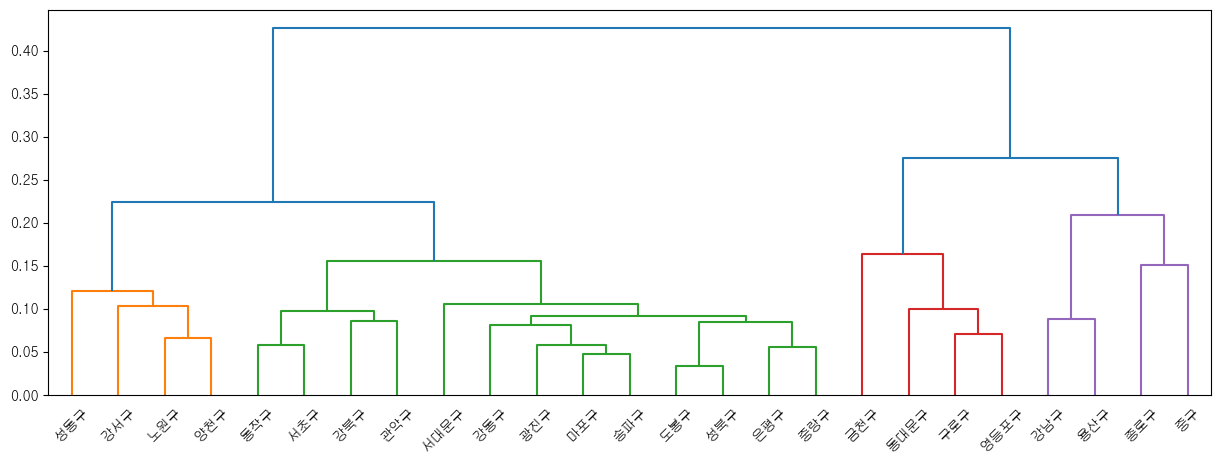

In [41]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path ='C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname =font_path).get_name()
rc('font', family =font)

plt.figure(figsize = (15, 5))
label = acf_df.index
dend1 = sch.linkage(acf_df, method = 'average')
cutoff = 0.5*max(dend1[:,2])
dend_res1 = sch.dendrogram(dend1, color_threshold = cutoff, labels=label)
plt.show()

In [4]:
## 3. 사회과학, 자연과학, 공학 세개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                     '공학': 공학},
                     index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
print(table)

         사회과학  자연과학  공학
3.5~4.5    16    12  18
2.5~3.5    30    20  13
1.5~2.5    12     3  14


In [15]:
# 카이제곱검정
# (1) 적합성 검정
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[[15.3, 15.3, 15.3], [15.3, 15.3, 15.3], [15.3, 15.3, 15.3]])
# chi = chisquare(table, f_exp=[15.3,15.3] )

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
[0.26361656 0.31142857 0.02      ]

In [18]:
# (2) 독립성검정
from scipy.stats import chi2_contingency
chi2_contingency(table)
# pvalue가 0.03719883770303157으로 0.05보다 작으므로 귀무가설을 기각한다. 서로 독립이 아니다.


(10.199441509990177,
 0.03719883770303157,
 4,
 array([[19.33333333, 11.66666667, 15.        ],
        [26.47826087, 15.97826087, 20.54347826],
        [12.1884058 ,  7.35507246,  9.45652174]]))

(10.199441509990177,
 0.03719883770303157,
 4,
 array([[19.33333333, 11.66666667, 15.        ],
        [26.47826087, 15.97826087, 20.54347826],
        [12.1884058 ,  7.35507246,  9.45652174]]))